Importa as bibliotecas Numpy e Pandas, e o data frame.

In [98]:
import numpy as np
import pandas as pd

# Selecionando apenas as colunas de interesse
columns = ['MUNICIPIO_CIRCUNSCRICAO', 'DATA_FATO', 'HORA_FATO', 'DESC_TIPOLOCAL', 'SEXO_PESSOA', 'IDADE_PESSOA', 'COR_PELE', 'Nº DE VIT EM LATRO'] 
df = pd.read_excel('Latrocinio_2018_2022.xlsx', usecols=columns)
df

,MUNICIPIO_CIRCUNSCRICAO,Nº DE VIT EM LATRO,DATA_FATO,HORA_FATO,DESC_TIPOLOCAL,SEXO_PESSOA,IDADE_PESSOA,COR_PELE
0,São Paulo,1,2018-01-21,00:02:00,Via pública,Masculino,59.0,Branca
1,São Paulo,1,2018-01-19,23:30:00,Via pública,Masculino,27.0,Branca
2,São Paulo,1,2018-01-10,21:00:00,Via pública,Masculino,59.0,Branca
3,São Paulo,1,2018-01-14,04:33:00,Via pública,Masculino,30.0,Parda
4,São Paulo,1,2018-01-30,13:20:00,Via pública,Masculino,68.0,Parda
...,...,...,...,...,...,...,...,...
273,Mogi das Cruzes,1,2018-12-09,20:17:00,Via pública,Masculino,64.0,Branca
274,Poá,1,2018-12-09,16:00:00,Via pública,Masculino,67.0,Parda
275,Osasco,1,2018-12-27,20:29:00,Comércio e serviços,Feminino,24.0,Branca
276,Osasco,1,2018-12-08,22:20:00,Via pública,Masculino,36.0,Parda


Padronizando strings

In [99]:
from unidecode import unidecode

df = df.applymap(lambda x: str.lower(x) if type(x) == str else x)
df = df.applymap(lambda x: unidecode(x) if type(x) == str else x)

Selecionando apenas as ocorrências na cidade de São Paulo

In [100]:
df = df[df['MUNICIPIO_CIRCUNSCRICAO'] == 'sao paulo']

Excluindo linhas que contenham algum dado NaN

In [101]:
df.dropna(axis=0)

,MUNICIPIO_CIRCUNSCRICAO,Nº DE VIT EM LATRO,DATA_FATO,HORA_FATO,DESC_TIPOLOCAL,SEXO_PESSOA,IDADE_PESSOA,COR_PELE
0,sao paulo,1,2018-01-21,00:02:00,via publica,masculino,59.0,branca
1,sao paulo,1,2018-01-19,23:30:00,via publica,masculino,27.0,branca
2,sao paulo,1,2018-01-10,21:00:00,via publica,masculino,59.0,branca
3,sao paulo,1,2018-01-14,04:33:00,via publica,masculino,30.0,parda
4,sao paulo,1,2018-01-30,13:20:00,via publica,masculino,68.0,parda
...,...,...,...,...,...,...,...,...
239,sao paulo,1,2018-11-11,19:30:00,via publica,masculino,32.0,branca
258,sao paulo,1,2018-12-29,23:50:00,terminal/estacao,feminino,27.0,amarela
259,sao paulo,1,2018-12-03,00:28:00,saude,masculino,56.0,branca
260,sao paulo,1,2018-12-16,04:30:00,via publica,masculino,32.0,branca


Alterando o tipo da coluna 'IDADE_PESSOA' de float para int

In [102]:
df['IDADE_PESSOA'] = df['IDADE_PESSOA'].fillna(0.0).astype(int)

Excluindo linhas que tenham idade de pessoas como 0 (são valores nulos)

In [103]:
df = df.loc[df['IDADE_PESSOA'] > 0]

Padronizando a coluna 'HORA_FATO' e deixando somente as linhas com o formato no tipo datatime.time

In [104]:
df = df[[not isinstance(x, str) for x in df['HORA_FATO']]]

In [105]:
df

,MUNICIPIO_CIRCUNSCRICAO,Nº DE VIT EM LATRO,DATA_FATO,HORA_FATO,DESC_TIPOLOCAL,SEXO_PESSOA,IDADE_PESSOA,COR_PELE
0,sao paulo,1,2018-01-21,00:02:00,via publica,masculino,59,branca
1,sao paulo,1,2018-01-19,23:30:00,via publica,masculino,27,branca
2,sao paulo,1,2018-01-10,21:00:00,via publica,masculino,59,branca
3,sao paulo,1,2018-01-14,04:33:00,via publica,masculino,30,parda
4,sao paulo,1,2018-01-30,13:20:00,via publica,masculino,68,parda
...,...,...,...,...,...,...,...,...
238,sao paulo,1,2018-11-26,03:50:00,via publica,masculino,51,branca
239,sao paulo,1,2018-11-11,19:30:00,via publica,masculino,32,branca
258,sao paulo,1,2018-12-29,23:50:00,terminal/estacao,feminino,27,amarela
259,sao paulo,1,2018-12-03,00:28:00,saude,masculino,56,branca


Gerando arquivo excel

In [106]:
df.to_excel('teste.xlsx', sheet_name='Teste', header=True, index=False)

In [107]:
df_vitimas_por_mes = df[['Nº DE VIT EM LATRO', 'DATA_FATO']]
df_V_M = df_vitimas_por_mes.groupby(pd.Grouper(key='DATA_FATO', freq='M')).sum()
df_V_M

,Nº DE VIT EM LATRO
DATA_FATO,
2018-01-31,5
2018-02-28,7
2018-03-31,3
2018-04-30,9
2018-05-31,4
2018-06-30,8
2018-07-31,6
2018-08-31,5
2018-09-30,11


<AxesSubplot:xlabel='DATA_FATO'>

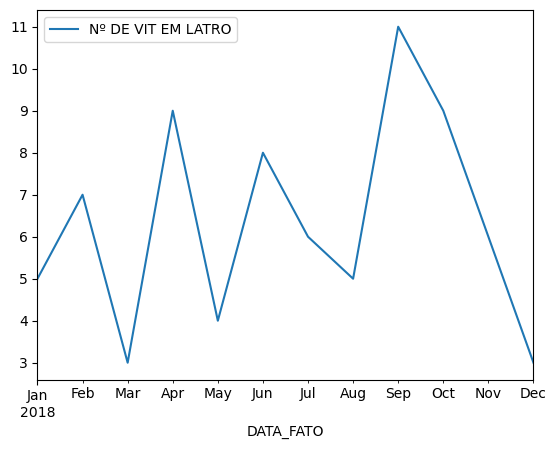

In [108]:
df_V_M.plot(kind='line')

In [109]:
# df['HORA_FATO'] = df['HORA_FATO'].astype('datatim') 
# df[['Nº DE VIT EM LATRO', 'HORA_FATO']].groupby(pd.Grouper(key='HORA_FATO', freq='4H')).sum()
import datetime

df['DATA_FATO'] = pd.to_datetime(df['DATA_FATO'], format='%Y-%m-%d')
df['HORA_FATO'] = pd.to_datetime(df['HORA_FATO'], format='%H:%M:%S').dt.time

df['DATA_HORA'] = pd.to_datetime(df['DATA_FATO'].astype(str) + ' ' + df['HORA_FATO'].astype(str))

In [112]:
df[['Nº DE VIT EM LATRO', 'DATA_HORA']].groupby(pd.Grouper(key='DATA_HORA', freq='4H')).sum()

,Nº DE VIT EM LATRO
DATA_HORA,
2018-01-10 20:00:00,1
2018-01-11 00:00:00,0
2018-01-11 04:00:00,0
2018-01-11 08:00:00,0
2018-01-11 12:00:00,0
...,...
2018-12-29 04:00:00,0
2018-12-29 08:00:00,0
2018-12-29 12:00:00,0


In [110]:
# import pandas as pd
# import datetime
# # criando um dataframe de exemplo
# df = pd.DataFrame({'hora': [datetime.time(9, 30, 0), datetime.time(10, 45, 0), datetime.time(12, 0, 0)]})

# # antes da conversão
# print(df.info())

# # convertendo a coluna "hora" para datetime
# df['hora'] = pd.to_datetime(df['hora'], format='%H:%M:%S')

# # depois da conversão
# print(df.info())

In [111]:
# import pandas as pd
# from datetime import datetime

# # criando um dataframe de exemplo
# df = pd.DataFrame({'data': ['2023-03-27', '2023-03-28'],
#                    'hora': ['09:00:00', '13:30:00']})

# # convertendo as colunas "data" e "hora" para datetime
# df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')
# df['hora'] = pd.to_datetime(df['hora'], format='%H:%M:%S').dt.time

# # concatenando as colunas "data" e "hora"
# df['data_hora'] = pd.to_datetime(df['data'].astype(str) + ' ' + df['hora'].astype(str))

# # exibindo o dataframe resultante
# print(df)
